<a href="https://colab.research.google.com/github/sophia1kucan/Next.js/blob/main/AIH_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Y = mx + c
Formula: Width = 0.42 × Length + -0.36
R² score: 0.93


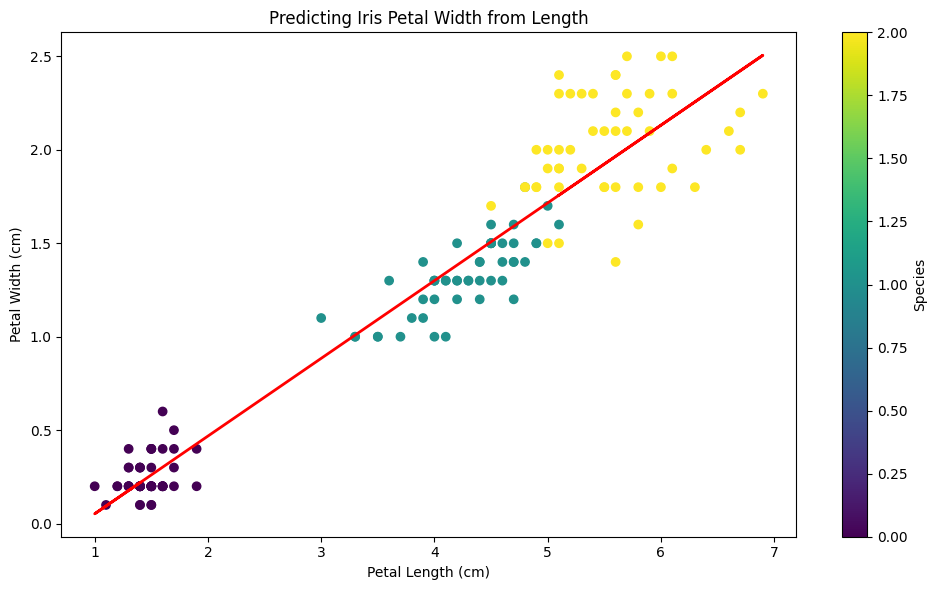

In [ ]:
# Import what we need
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data[:, 2].reshape(-1, 1)  # Petal length (input)
y = iris.data[:, 3]  # Petal width (what we're predicting)

# Create and train our model
model = LinearRegression()
model.fit(X, y)

# Get coefficient and intercept (our formula)
m = model.coef_[0]
b = model.intercept_
print("Y = mx + c")
print(f"Formula: Width = {m:.2f} × Length + {b:.2f}")

# Calculate how well our model fits the data
score = model.score(X, y)
print(f"R² score: {score:.2f}")

# Create a scatter plot with prediction line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=iris.target, cmap='viridis')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Predicting Iris Petal Width from Length')
plt.colorbar(label='Species')
plt.tight_layout()
plt.show()

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.73      0.74      0.73        50
   virginica       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



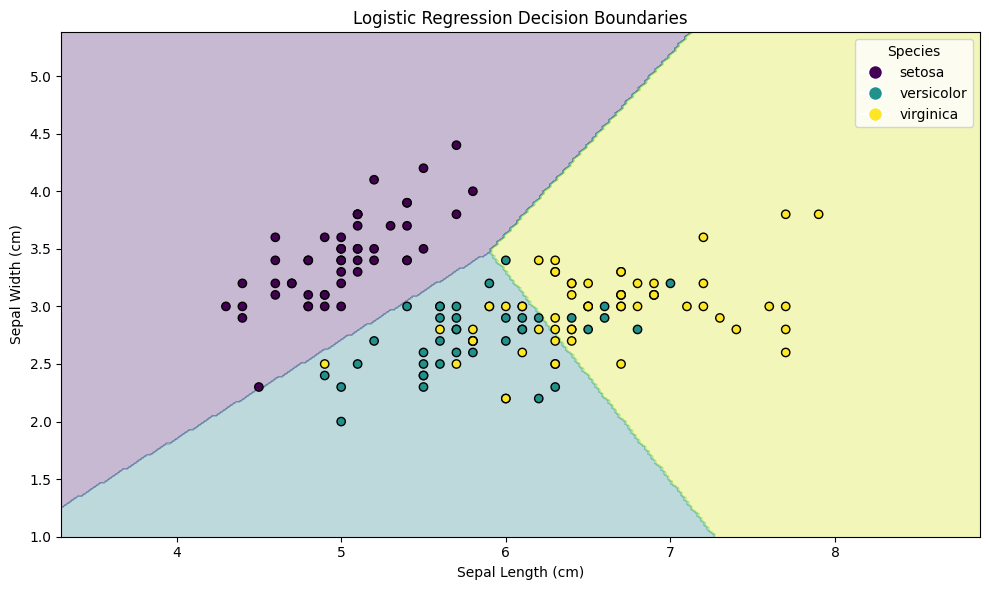

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
iris = load_iris()
X = iris.data[:, :2]  # Sepal length and width only
y = iris.target       # Species (0, 1, or 2)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=iris.target_names))

# Create a colorful decision boundary plot
def plot_decision_boundary(X, y, model, iris):
    # Set up the meshgrid
    h = .02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Logistic Regression Decision Boundaries')

    # Fixed legend code - create a legend manually
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=plt.cm.viridis(i/2),
                                 markersize=10)
                      for i in range(3)]
    plt.legend(legend_elements, iris.target_names, title="Species")

    plt.tight_layout()
    plt.show()

# Show the decision boundaries
plot_decision_boundary(X, y, model, iris)

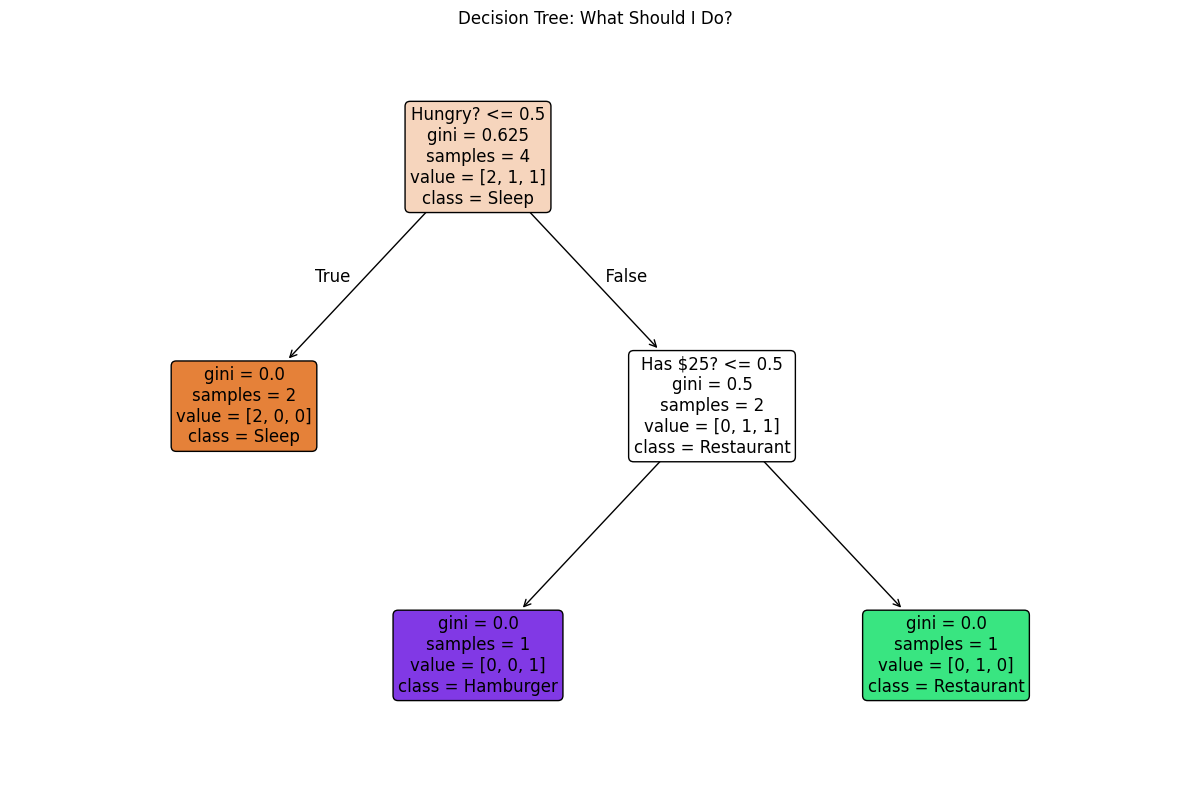

Decision Rules:
1. If not hungry → Sleep
2. If hungry and has $25 → Restaurant
3. If hungry but doesn't have $25 → Hamburger


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create our dataset
# Features: [hungry (0=No, 1=Yes), has_25_dollars (0=No, 1=Yes)]
# Decisions: 0=Sleep, 1=Restaurant, 2=Hamburger
X = np.array([
    [0, 0],  # Not hungry, no money -> Sleep
    [0, 1],  # Not hungry, has money -> Sleep
    [1, 0],  # Hungry, no money -> Hamburger
    [1, 1],  # Hungry, has money -> Restaurant
])

y = np.array([0, 0, 2, 1])  # The corresponding decisions

# Create and train the decision tree
# We set max_depth=2 to match our example tree structure
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Define feature and class names for better visualization
feature_names = ['Hungry?', 'Has $25?']
class_names = ['Sleep', 'Restaurant', 'Hamburger']

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree: What Should I Do?")
plt.tight_layout()
plt.show()

# Print the decision rules
print("Decision Rules:")
print("1. If not hungry → Sleep")
print("2. If hungry and has $25 → Restaurant")
print("3. If hungry but doesn't have $25 → Hamburger")

In [ ]:
# Interactive testing of our decision tree
def test_decision_tree():
    print("\n===== Decision Tree Interactive Testing =====")
    print("Let's decide what you should do!")

    while True:
        try:
            # Get user input
            hungry = input("\nAre you hungry? (yes/no): ").lower()
            if hungry not in ['yes', 'no']:
                print("Please enter 'yes' or 'no'")
                continue

            if hungry == 'yes':
                has_money = input("Do you have $25? (yes/no): ").lower()
                if has_money not in ['yes', 'no']:
                    print("Please enter 'yes' or 'no'")
                    continue
            else:
                # If not hungry, we don't need to ask about money
                has_money = "doesn't matter"

            # Convert input to model format
            hungry_val = 1 if hungry == 'yes' else 0
            money_val = 1 if has_money == 'yes' else 0

            # Make prediction
            features = np.array([[hungry_val, money_val]])
            prediction = tree_clf.predict(features)[0]

            # Display result
            print("\nDecision Tree Recommends:", class_names[prediction])

            # Explanation
            if prediction == 0:
                print("You're not hungry, so you should go to sleep.")
            elif prediction == 1:
                print("You're hungry and have enough money, so you should go to a restaurant.")
            else:
                print("You're hungry but short on cash, so you should buy a hamburger.")

            # Ask if user wants to try again
            again = input("\nTry another scenario? (yes/no): ").lower()
            if again != 'yes':
                print("Thanks for testing the decision tree!")
                break

        except Exception as e:
            print(f"An error occurred: {e}")
            print("Let's try again.")

# Run the interactive testing function
test_decision_tree()


===== Decision Tree Interactive Testing =====
Let's decide what you should do!

Are you hungry? (yes/no): yes
Do you have $25? (yes/no): yes

Decision Tree Recommends: Restaurant
You're hungry and have enough money, so you should go to a restaurant.

Try another scenario? (yes/no): yes

Are you hungry? (yes/no): no

Decision Tree Recommends: Sleep
You're not hungry, so you should go to sleep.


KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    # Activation function
    return 1 / (1 + np.exp(-x))

def forward_propagation(inputs, weights, bias):
    # Forward propagation function
    z = np.dot(inputs, weights) + bias
    output = sigmoid(z)
    return output

def sigmoid_derivative(x):
    # Derivative of sigmoid function
    return x * (1 - x)

def back_propagation(output, target_output, inputs):
    # Compute error
    error = target_output - output
    d_output = error * sigmoid_derivative(output)

    # Compute gradients
    dw = np.dot(inputs.T, d_output)
    db = np.sum(d_output, axis=0, keepdims=True)

    return dw, db

def gradient_descent(weights, bias, dw, db, learning_rate):
    # Adjust weights and bias
    weights += learning_rate * dw
    bias += learning_rate * db
    return weights, bias

# inputs = np.array([[0.5, 0.6, 0.1]]) # Input data with additional dimension
# weights = np.random.randn(3, 1) # Random weights
# bias = np.zeros((1, 1)) # Bias

# # Forward Propagation
# output = forward_propagation(inputs, weights, bias)
# print(f"Output: {output}")

# target_output = np.array([[0.8]]) # Target output with additional dimension
# learning_rate = 2 # the default learning rate in most ML frameworks is set to 0.01.


# # Backpropagation to compute gradients
# dw, db = back_propagation(output, target_output, inputs)

# # Gradient descent to update weights and bias
# weights, bias = gradient_descent(weights, bias, dw, db, learning_rate)

# print(f"Updated weights: {weights}")
# print(f"Updated bias: {bias}")

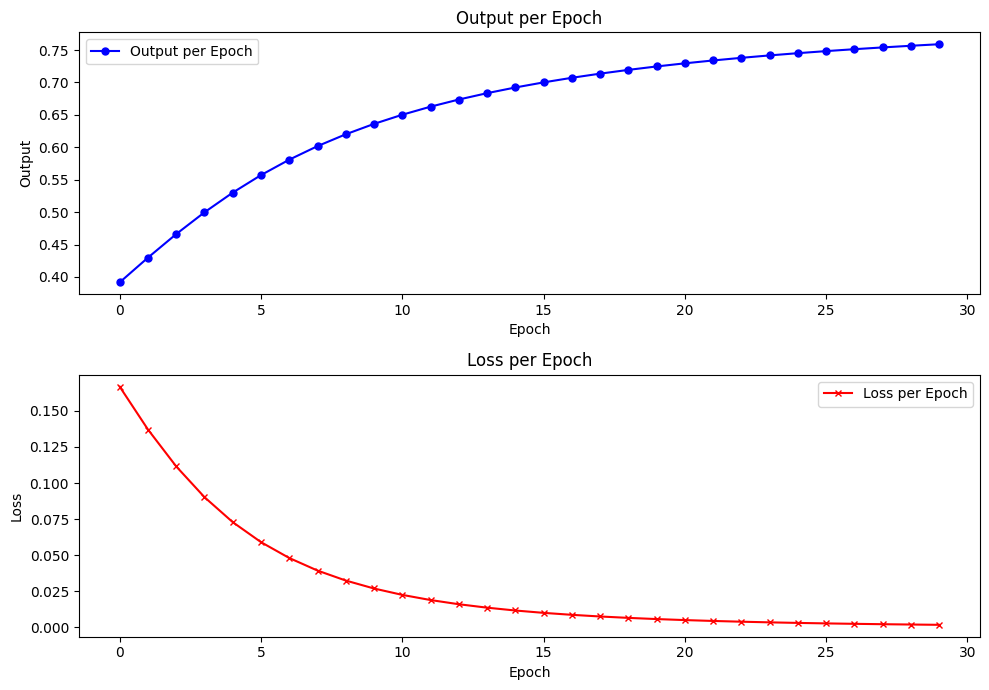

Final weights: [[ 0.53493791]
 [-0.17158196]
 [ 0.07374521]]
Final bias: [[0.98749042]]


In [ ]:
inputs = np.array([[0.5, 0.6, 0.1]])
weights = np.random.randn(3, 1)
bias = np.zeros((1, 1))
target_output = np.array([[0.8]])
learning_rate = 1

# Initialise lists to store epochs, losses, and outputs
epochs = 30
losses = []
outputs = []

for epoch in range(epochs):
    # Forward Propagation
    output = forward_propagation(inputs, weights, bias)

    # Store the output and loss for plotting
    outputs.append(output[0][0])
    loss = np.mean(np.square(target_output - output))
    losses.append(loss)

    # Backpropagation and Gradient Descent
    dw, db = back_propagation(output, target_output, inputs)
    weights, bias = gradient_descent(weights, bias, dw, db, learning_rate)

# Plotting
fig, axs = plt.subplots(2, figsize=(10, 7))

# Output per Epoch with Data Points
axs[0].plot(range(epochs), outputs, 'b-', marker='o', markersize=5, markevery=1, label='Output per Epoch') # markevery=10 will only mark every 10th data point
axs[0].set_title('Output per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Output')
axs[0].legend()

# Loss per Epoch with Data Points
axs[1].plot(range(epochs), losses, 'r-', marker='x', markersize=5, markevery=1, label='Loss per Epoch') # markevery=10 will only mark every 10th data point
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

print(f"Final weights: {weights}")
print(f"Final bias: {bias}")